In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset
df = pd.read_excel(r"C:\Users\hp\Desktop\DIAMOND\diamonds2.xlsx", index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
# Now convert these values to numeric values so
# that regression can run on it. but we also want to
# preserve the relationship hence lets create a 
# dictionary


cut_class_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
clarity_dict = {"I3":1, "I2":2, "I1":3, "SI2":4, "SI1":5, "VS2":6, "VS1":7, "VVS2":8, "VVS1":9, "IF":10, "FL":11}
color_dict = {"E":6, "I":2, "J":1, "H":3, "F":5, "G":4, "D":7}




In [ ]:
# now we can map these into our data-frames
df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)

In [ ]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(df, annot=True)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df['cut/wt']=df['cut']/df['carat']
df['color/wt']=df['color']/df['carat']
df['clarity/wt']=df['clarity']/df['carat']
df = df.drop(['cut','color','clarity','table','depth'], axis=1)

In [ ]:
df.head()

,carat,price,x,y,z,cut/wt,color/wt,clarity/wt
1,0.23,326,3.95,3.98,2.43,21.739130,26.086957,17.391304
2,0.21,326,3.89,3.84,2.31,19.047619,28.571429,23.809524
3,0.23,327,4.05,4.07,2.31,8.695652,26.086957,30.434783
4,0.29,334,4.20,4.23,2.63,13.793103,6.896552,20.689655
5,0.31,335,4.34,4.35,2.75,6.451613,3.225806,12.903226


In [ ]:
#shuffling the data 
import sklearn
from sklearn import preprocessing

df = sklearn.utils.shuffle(df)

X = df.drop("price", axis=1).values
X = preprocessing.scale(X)   # to scale the data
y = df['price'].values



In [ ]:
#Splitting the Dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [ ]:
#Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([3209.82911369, 1515.97681078,  119.87315926,   -3.7228007 ,
        157.49609801,  467.76371867,  874.49210586])

In [ ]:
reg.intercept_

3933.322679840731

In [ ]:
#predicting the test set results
y_pred=reg.predict(X_test)

In [ ]:
y_pred

array([7007.45332801, 2483.49433863,  316.30588951, ..., 3484.33499693,
       9762.19109964, 3405.6735383 ])

In [ ]:
for X, y in zip(X_test, y_test):
    print(f"Model: {reg.predict([X])[0]}, Actual: {y}")

Model: 7007.453328010857, Actual: 5832
Model: 2483.4943386327936, Actual: 2375
Model: 316.3058895068998, Actual: 672
Model: -240.5007937489977, Actual: 628
Model: 4055.5063444670614, Actual: 3099
Model: 2845.2326936354893, Actual: 2671
Model: 243.1923192514323, Actual: 599
Model: 5208.61684509228, Actual: 3633
Model: 2362.18611540362, Actual: 2293
Model: 569.0965393121719, Actual: 645
Model: 1243.514163787871, Actual: 1080
Model: 12597.887148530594, Actual: 12308
Model: 2524.5121952375866, Actual: 2542
Model: 5891.43733048443, Actual: 4414
Model: 10677.272260935399, Actual: 9229
Model: 1535.186622055438, Actual: 1576
Model: 5503.954574107504, Actual: 4827
Model: 1249.0017989167527, Actual: 1066
Model: 7037.838538807792, Actual: 9934
Model: 8181.892678236793, Actual: 4373
Model: 1551.3925960914157, Actual: 990
Model: 4494.194773304862, Actual: 4345
Model: 1139.9077585352206, Actual: 1386
Model: 6295.51618306097, Actual: 4054
Model: 7950.203859223577, Actual: 5876
Model: 9674.94963027716

Model: 1037.477874865136, Actual: 936
Model: 4376.053587680025, Actual: 4439
Model: 463.2215353826591, Actual: 625
Model: 3738.104149711292, Actual: 5841
Model: 7464.579682470822, Actual: 4704
Model: 2913.0063165094307, Actual: 3023
Model: 2615.401775188274, Actual: 2549
Model: 568.4304935662049, Actual: 771
Model: 818.3575948520124, Actual: 1237
Model: 1704.4791413601502, Actual: 1084
Model: 6885.456749708022, Actual: 5439
Model: 1650.434341957996, Actual: 1362
Model: 6826.08591042964, Actual: 5544
Model: 1568.1785659513803, Actual: 1295
Model: 1162.3529922465577, Actual: 1103
Model: 10256.099787758878, Actual: 11711
Model: 1213.8043085156128, Actual: 1446
Model: 3156.0188419094293, Actual: 2762
Model: 2123.483293976885, Actual: 2220
Model: 1233.128245376026, Actual: 1239
Model: 660.0259592571001, Actual: 906
Model: 1231.6528065268594, Actual: 548
Model: 1142.1667246702764, Actual: 710
Model: 13973.266293435612, Actual: 17592
Model: 11520.320906990462, Actual: 13486
Model: 333.4405028

Model: 2260.702933937364, Actual: 2217
Model: 1245.5683232888268, Actual: 1381
Model: 770.4857277411775, Actual: 767
Model: 705.7481268303668, Actual: 499
Model: 6834.826774727013, Actual: 3864
Model: 2907.171171507888, Actual: 2308
Model: 2936.294033474426, Actual: 2648
Model: 4467.715507531953, Actual: 4668
Model: 784.2000768057933, Actual: 823
Model: 4507.964129221207, Actual: 5013
Model: 6286.781309530763, Actual: 4788
Model: 803.736065421394, Actual: 773
Model: 5557.364184544926, Actual: 3337
Model: 194.7921507107576, Actual: 675
Model: 1285.5546286666745, Actual: 1415
Model: 6275.988008996298, Actual: 7281
Model: 2754.6162120135696, Actual: 2441
Model: 576.3889077032532, Actual: 1047
Model: 1023.0342062845316, Actual: 931
Model: 849.3764846755475, Actual: 1015
Model: 10858.91509811482, Actual: 5310
Model: -307.9352523989469, Actual: 492
Model: 10446.789298860458, Actual: 8515
Model: 7611.873617554738, Actual: 8400
Model: 1745.8271857524664, Actual: 1676
Model: 4260.348524398095, 

Model: 1573.6357326261455, Actual: 612
Model: 1451.1240715434342, Actual: 1243
Model: 1647.0802798846862, Actual: 646
Model: 5516.082758320994, Actual: 5620
Model: 1797.6467466101876, Actual: 1619
Model: 726.0635682927182, Actual: 511
Model: 2851.480122694271, Actual: 3421
Model: 3028.677143527304, Actual: 1730
Model: 424.70031870992034, Actual: 802
Model: 3351.9801786201633, Actual: 3762
Model: 3019.1651430797338, Actual: 3217
Model: 1778.602411463116, Actual: 1796
Model: -475.03365249109766, Actual: 489
Model: 1023.6528041393854, Actual: 1063
Model: 5342.217242602237, Actual: 3769
Model: 2035.950390514334, Actual: 1845
Model: 1167.3501552837247, Actual: 694
Model: 7304.459768570685, Actual: 5810
Model: 6608.728951423331, Actual: 5179
Model: 9239.260565723796, Actual: 6773
Model: 8196.693537838972, Actual: 11061
Model: 1374.6350513250632, Actual: 863
Model: 1121.9139776252623, Actual: 772
Model: 912.0747786250527, Actual: 1163
Model: 5011.359453650769, Actual: 4339
Model: 2794.5561241

Model: 1709.226473729433, Actual: 1957
Model: 1292.5593388284892, Actual: 814
Model: 6650.529997516931, Actual: 5116
Model: 3073.1876635292674, Actual: 3478
Model: 602.050995796581, Actual: 738
Model: 5331.23134447694, Actual: 7455
Model: -755.8967664818015, Actual: 421
Model: 14197.73087044429, Actual: 18236
Model: 5140.773867027755, Actual: 4255
Model: 396.37331085179994, Actual: 1048
Model: 678.8450970706886, Actual: 951
Model: 5212.7714883573335, Actual: 6283
Model: 1800.1766799036618, Actual: 1061
Model: 1465.730874107458, Actual: 880
Model: 22.47516159719862, Actual: 576
Model: 3993.9284639427096, Actual: 3696
Model: 951.0300824614942, Actual: 878
Model: 305.55335556354567, Actual: 622
Model: 2337.2262611492097, Actual: 2615
Model: 5758.778440899413, Actual: 8532
Model: 64.91423497115011, Actual: 840
Model: 1987.6324328936007, Actual: 1376
Model: 7648.025627381967, Actual: 8705
Model: 227.0178460925813, Actual: 719
Model: 4552.060857530971, Actual: 3438
Model: -812.8438680245049,

Model: 1640.9994358264307, Actual: 1200
Model: 3987.0929942267367, Actual: 3756
Model: 6503.658162852702, Actual: 5086
Model: 6064.69646943201, Actual: 3942
Model: 5874.641886387178, Actual: 7197
Model: 3864.574691211006, Actual: 3006
Model: 1307.9530675048713, Actual: 1160
Model: 4907.937196570039, Actual: 3818
Model: 461.17876195598365, Actual: 666
Model: 5391.119570140526, Actual: 6027
Model: -732.8948081316853, Actual: 421
Model: 1568.2353009793396, Actual: 1565
Model: 14832.830916931314, Actual: 13307
Model: 748.2999375036807, Actual: 969
Model: 206.93786335853792, Actual: 921
Model: 1398.2100945478942, Actual: 1250
Model: 1892.7350200156945, Actual: 1944
Model: 1518.254195092225, Actual: 1323
Model: 2900.5869364637997, Actual: 3107
Model: 8564.128250002763, Actual: 9088
Model: 2050.558035403088, Actual: 2301
Model: 9736.50106882967, Actual: 8499
Model: 4962.314446859144, Actual: 4181
Model: 5374.933397136785, Actual: 4662
Model: 2554.8847357938644, Actual: 1579
Model: 3081.763596

Model: 832.2925942286511, Actual: 982
Model: 14084.804786171859, Actual: 18630
Model: 1381.2851753802906, Actual: 1106
Model: 1736.1342060840198, Actual: 1600
Model: 1662.211415370722, Actual: 1974
Model: 3291.4912531445943, Actual: 3263
Model: 2517.207469622916, Actual: 2833
Model: 14698.789618505258, Actual: 16783
Model: 1492.7024983133379, Actual: 1324
Model: 7225.9198942689545, Actual: 6015
Model: 5763.327020976845, Actual: 4521
Model: 1025.9567239338376, Actual: 1287
Model: 11511.625513313382, Actual: 15014
Model: 5169.4764824155845, Actual: 4753
Model: 5902.319042431831, Actual: 3700
Model: 1634.7168327967115, Actual: 1776
Model: 1007.6515556365007, Actual: 665
Model: 5674.151133592468, Actual: 5226
Model: -681.5759312206706, Actual: 449
Model: 5555.729767326828, Actual: 4193
Model: 1561.1976385413732, Actual: 1970
Model: 1771.894006145726, Actual: 1822
Model: 5386.996583982369, Actual: 4044
Model: 15739.901612964613, Actual: 11147
Model: 2977.1443348830244, Actual: 2767
Model: 5

Model: 1022.6748323654901, Actual: 805
Model: 1992.3022347515534, Actual: 2116
Model: 5000.560973481941, Actual: 4586
Model: 7906.9542876829, Actual: 7044
Model: 312.2749657067925, Actual: 574
Model: 5104.979060035226, Actual: 3959
Model: 1348.7278304916586, Actual: 1094
Model: 1965.180810806076, Actual: 886
Model: 1464.3222810454577, Actual: 1258
Model: 948.16928590836, Actual: 789
Model: 5048.491295843216, Actual: 5483
Model: 3199.9143015516784, Actual: 2873
Model: 3239.8479822566787, Actual: 2770
Model: 2148.5956978736117, Actual: 1817
Model: 10417.737297579772, Actual: 4849
Model: 4375.073095447127, Actual: 3751
Model: 0.8252555807330282, Actual: 573
Model: 8396.45234038326, Actual: 10012
Model: 294.7557209325837, Actual: 666
Model: 2102.6020959358816, Actual: 2125
Model: 4763.12789615594, Actual: 3634
Model: 6731.193724577984, Actual: 8346
Model: 6370.696232318815, Actual: 6891
Model: 5460.785389628254, Actual: 5939
Model: 5451.089597198688, Actual: 5633
Model: 726.0431259583697, 

Model: 5995.049862941531, Actual: 5361
Model: 5219.362726249261, Actual: 4416
Model: 2253.5475032111062, Actual: 2730
Model: 2136.4232993973774, Actual: 2079
Model: 42.796318682329456, Actual: 524
Model: 3774.9055428617135, Actual: 3195
Model: 1487.8144401130503, Actual: 1838
Model: 284.15532741713287, Actual: 667
Model: 3877.6430063165917, Actual: 3057
Model: 549.0609868109809, Actual: 906
Model: 2629.6199779254825, Actual: 2361
Model: 5880.17953251488, Actual: 4733
Model: 12553.683089408729, Actual: 9955
Model: 10096.631068819455, Actual: 10384
Model: -283.50709654297907, Actual: 557
Model: 10107.18639551172, Actual: 11820
Model: 571.985596127452, Actual: 644
Model: 3072.1769762890553, Actual: 3319
Model: 7113.823066771316, Actual: 5028
Model: 6199.7898253739895, Actual: 5012
Model: 8277.555477668635, Actual: 10423
Model: 212.87978833130182, Actual: 828
Model: 7133.008494200433, Actual: 5181
Model: 294.6882396200431, Actual: 596
Model: -175.12612403700905, Actual: 521
Model: 10138.66

Model: 6489.4662965263815, Actual: 5171
Model: 193.95963506200223, Actual: 705
Model: 1801.9282838925242, Actual: 597
Model: 222.18443089863604, Actual: 462
Model: 4042.879491408737, Actual: 3556
Model: 2982.100766931432, Actual: 2572
Model: 2165.1640061465123, Actual: 2460
Model: 5303.111966771741, Actual: 5622
Model: 657.6194407431858, Actual: 710
Model: 7290.3809369857445, Actual: 4553
Model: 17277.99483904482, Actual: 9716
Model: 4059.986957109718, Actual: 2737
Model: 5109.947399196646, Actual: 4199
Model: 541.2765184998261, Actual: 1089
Model: 1190.273625492402, Actual: 556
Model: 3243.6604454006742, Actual: 2737
Model: 9241.453057895917, Actual: 7291
Model: 5171.517116370795, Actual: 5879
Model: 5445.98847383777, Actual: 6465
Model: 4966.60671793262, Actual: 3119
Model: 1650.9970511382076, Actual: 1607
Model: 10700.83582904382, Actual: 9355
Model: 1095.8574483412813, Actual: 1316
Model: 14113.627037618176, Actual: 16231
Model: 1857.0322903432575, Actual: 1204
Model: 703.898866071

Model: 5231.484251613344, Actual: 5197
Model: 3137.4563429119853, Actual: 2608
Model: 533.7535723764636, Actual: 456
Model: 1627.9337489296017, Actual: 1781
Model: 5352.114373973931, Actual: 5741
Model: 3591.8618129046386, Actual: 2975
Model: 1147.5370149902733, Actual: 995
Model: 6091.694672699585, Actual: 5602
Model: 3328.8142234968955, Actual: 3716
Model: 5346.75186354938, Actual: 4558
Model: 859.9131733031581, Actual: 1406
Model: 7735.729009059412, Actual: 4543
Model: 2846.475222431758, Actual: 3248
Model: 411.4255838747208, Actual: 643
Model: 5785.409554927817, Actual: 7167
Model: 5419.779023008045, Actual: 3975
Model: 1463.684501270111, Actual: 955
Model: 1319.7411834153, Actual: 1449
Model: 2800.22211576511, Actual: 2401
Model: 10290.729374203209, Actual: 11795
Model: 5292.992181853177, Actual: 5997
Model: 2905.280003243234, Actual: 2583
Model: 11744.746674049296, Actual: 18398
Model: 5320.128322522349, Actual: 5930
Model: 14165.63763957121, Actual: 17403
Model: -161.97253572375

Model: 388.8571851572133, Actual: 522
Model: 1713.2175996897167, Actual: 1092
Model: 5240.810855139434, Actual: 5051
Model: 5115.235152757765, Actual: 4118
Model: 1487.5761803048335, Actual: 1234
Model: 129.1780950190282, Actual: 584
Model: 7511.254375975279, Actual: 7117
Model: 1384.4894074757876, Actual: 1154
Model: 2541.610820145331, Actual: 2596
Model: 1257.0257418330157, Actual: 669
Model: 597.7944764520817, Actual: 548
Model: 5622.262873858131, Actual: 4478
Model: 6915.86533701724, Actual: 5884
Model: 161.3491776609717, Actual: 561
Model: 575.5058958498566, Actual: 731
Model: 682.91385518573, Actual: 827
Model: 1141.121080712739, Actual: 1033
Model: 3336.412156530425, Actual: 2736
Model: 1019.6751714823381, Actual: 1007
Model: 9808.3167298809, Actual: 13757
Model: 5410.582028023064, Actual: 7007
Model: 518.2178181812119, Actual: 705
Model: 4351.560093514715, Actual: 3371
Model: 7167.995314417814, Actual: 4805
Model: 2246.576424843729, Actual: 2141
Model: 567.37975606693, Actual: 

Model: 9481.08642110619, Actual: 8039
Model: -417.51439329134655, Actual: 539
Model: 1545.6751014582933, Actual: 1264
Model: 5486.020811185968, Actual: 5904
Model: 1341.435596582587, Actual: 1330
Model: 1795.4613877685729, Actual: 2506
Model: 4329.246824726601, Actual: 3084
Model: 5528.172391395208, Actual: 5331
Model: 4311.259321276095, Actual: 3881
Model: 13641.022779783752, Actual: 11566
Model: 1243.5019950607489, Actual: 1163
Model: 10150.729362778226, Actual: 13077
Model: 6473.420651827922, Actual: 8063
Model: 5366.078627708692, Actual: 4626
Model: 5767.358715784505, Actual: 4654
Model: 10230.830149382067, Actual: 11820
Model: 4123.521256619423, Actual: 3710
Model: 7595.744446094079, Actual: 5068
Model: 917.4788310842923, Actual: 710
Model: 9202.7903786849, Actual: 8291
Model: 1165.8171486056794, Actual: 610
Model: 4473.215585782818, Actual: 4022
Model: 856.811214491493, Actual: 1091
Model: 18013.72728561695, Actual: 8467
Model: 2130.017114580963, Actual: 2042
Model: 782.355510483

Model: 2414.1860065999376, Actual: 3032
Model: 4080.5871470214724, Actual: 3776
Model: 1180.769443325763, Actual: 1053
Model: 5915.252560506762, Actual: 3804
Model: -452.8816735078849, Actual: 610
Model: 4353.0993245372565, Actual: 3630
Model: 1155.8721347650476, Actual: 487
Model: 9404.228011646108, Actual: 9523
Model: 6085.563639595724, Actual: 8954
Model: 5585.685873088174, Actual: 3599
Model: 158.7814580353056, Actual: 720
Model: 2743.2524745196306, Actual: 3185
Model: 1532.6586833277593, Actual: 1070
Model: 1676.9242403254261, Actual: 472
Model: 10002.446795528049, Actual: 7832
Model: 5275.017840462928, Actual: 5239
Model: 7087.264650868206, Actual: 10053
Model: 1020.2106618261319, Actual: 1438
Model: -233.70822404861292, Actual: 608
Model: 5376.782741228742, Actual: 4978
Model: 3236.7376562866357, Actual: 3294
Model: 9057.620621758457, Actual: 6980
Model: 7440.924052488115, Actual: 5715
Model: 6314.480675788098, Actual: 4959
Model: 1964.785191106197, Actual: 2365
Model: -317.7162

Model: 969.3418458512647, Actual: 894
Model: 347.0772719313777, Actual: 765
Model: 802.262132893195, Actual: 568
Model: 4174.058967447008, Actual: 3806
Model: 1182.2239219204785, Actual: 633
Model: 3709.7948714998683, Actual: 2659
Model: 14652.608423074118, Actual: 15175
Model: 3769.9865163039085, Actual: 3043
Model: 7810.6500977737105, Actual: 6356
Model: 1379.9679050727823, Actual: 1043
Model: 1119.628756866874, Actual: 850
Model: 2689.555244096008, Actual: 2494
Model: 2389.9718664145466, Actual: 2276
Model: 2003.9108058146667, Actual: 485
Model: 3023.72075877769, Actual: 2940
Model: 1715.6374955054912, Actual: 1759
Model: 13628.508269700678, Actual: 9651
Model: 3598.209897358302, Actual: 3285
Model: 2728.162050260911, Actual: 1764
Model: 14485.51989247925, Actual: 14982
Model: 394.93362141441094, Actual: 882
Model: 7900.985922570495, Actual: 6873
Model: 952.8173018450307, Actual: 774
Model: 6872.548137929138, Actual: 5174
Model: 14752.320338302514, Actual: 13148
Model: 6193.90659774

Model: 4652.412081327328, Actual: 6466
Model: 913.559276445028, Actual: 600
Model: 1049.4928055365067, Actual: 1181
Model: 1239.7919705379936, Actual: 863
Model: 2634.020188372213, Actual: 2237
Model: 9291.73943324538, Actual: 7207
Model: 4415.507481139266, Actual: 4137
Model: 6352.304605511577, Actual: 8295
Model: 5318.562303097622, Actual: 2841
Model: 2594.6807142653306, Actual: 2215
Model: 5486.020889966853, Actual: 6153
Model: 2953.6549345845833, Actual: 2239
Model: 6714.033825327531, Actual: 4058
Model: 1397.9001776005634, Actual: 895
Model: 9586.693376589696, Actual: 7145
Model: 8593.345514693327, Actual: 11640
Model: 9889.40419767522, Actual: 14692
Model: 736.5298418378957, Actual: 1021
Model: 7076.937780648835, Actual: 5000
Model: 5940.984883813505, Actual: 8537
Model: 6283.816064336849, Actual: 5056
Model: 1518.020971407384, Actual: 1213
Model: 6963.879210571841, Actual: 4735
Model: 8367.670826205815, Actual: 5796
Model: 2838.5128140050056, Actual: 2526
Model: 4790.92913492912

Model: 3207.50424820149, Actual: 2829
Model: 7112.7897445853105, Actual: 5763
Model: 898.772821340282, Actual: 965
Model: 814.8281266128583, Actual: 997
Model: 751.8753955822685, Actual: 842
Model: 9735.18841092619, Actual: 15992
Model: 7239.803236596481, Actual: 7050
Model: 5474.596564125833, Actual: 6327
Model: 9631.459319704569, Actual: 12466
Model: 7420.467031894077, Actual: 5547
Model: 5652.741270571716, Actual: 7324
Model: 1248.826740975041, Actual: 1052
Model: 14234.512648934344, Actual: 18578
Model: 1384.3731905535128, Actual: 1607
Model: 69.30700647741696, Actual: 477
Model: 4330.120621454905, Actual: 3972
Model: 2492.6012416191234, Actual: 2104
Model: 2813.307974168483, Actual: 2355
Model: 8737.206468436201, Actual: 8874
Model: 5284.581953890103, Actual: 5299
Model: 5174.1732827114465, Actual: 4416
Model: 6216.159139923141, Actual: 6387
Model: 4113.900750835757, Actual: 3160
Model: -16.66682188201912, Actual: 603
Model: 10268.03060258369, Actual: 18294
Model: 962.269462633531

Model: 723.6285450953828, Actual: 1061
Model: 4188.845895273837, Actual: 3484
Model: 1303.3527283476005, Actual: 1369
Model: 5188.480089075588, Actual: 5747
Model: 9702.440894041109, Actual: 14071
Model: 589.7412724292103, Actual: 872
Model: 7990.89502802966, Actual: 6463
Model: 5134.789435246574, Actual: 4909
Model: 3203.892560825534, Actual: 4281
Model: 1677.7477382024977, Actual: 955
Model: 17974.759101642278, Actual: 18325
Model: 1258.0462316719263, Actual: 945
Model: 1547.7605293382817, Actual: 1689
Model: 1391.5941806788683, Actual: 1123
Model: 5383.391217899005, Actual: 5312
Model: -363.5047580840078, Actual: 581
Model: 2359.247476362596, Actual: 1826
Model: -1084.7809340613799, Actual: 408
Model: 171.4915204070644, Actual: 673
Model: 10962.935845102495, Actual: 8115
Model: 2025.0075957693484, Actual: 530
Model: 7211.350602632632, Actual: 5504
Model: 1502.4412113775743, Actual: 828
Model: 4987.66751113218, Actual: 3765
Model: 9732.694386253048, Actual: 7730
Model: 176.6403891116

Model: 5493.743496965009, Actual: 7979
Model: 1091.2998779565169, Actual: 794
Model: 5932.341009483266, Actual: 8590
Model: 2962.771393037775, Actual: 2872
Model: 456.366899038675, Actual: 649
Model: 492.183578296057, Actual: 722
Model: 642.9464672853605, Actual: 586
Model: 2343.291553653423, Actual: 2277
Model: 7215.657227077043, Actual: 5880
Model: 921.5171927307051, Actual: 1170
Model: 5180.632637741769, Actual: 4540
Model: 1649.3551260069798, Actual: 478
Model: -216.34120427192056, Actual: 784
Model: 810.4406442937434, Actual: 533
Model: 2162.91482113812, Actual: 2394
Model: 2690.2623394236193, Actual: 1991
Model: 6305.332624610165, Actual: 4905
Model: 5228.376637372361, Actual: 4579
Model: 1941.1387017731545, Actual: 1957
Model: 7046.607891462074, Actual: 4410
Model: 949.8725939961842, Actual: 1098
Model: 1347.2437405936503, Actual: 842
Model: 17835.023176477705, Actual: 16715
Model: 5592.590186593471, Actual: 5313
Model: 10127.726603762254, Actual: 7695
Model: 1474.256539727378, 

Model: 5470.168238993637, Actual: 6794
Model: 5598.56908693966, Actual: 4440
Model: 294.2142703363702, Actual: 743
Model: 14718.85677738373, Actual: 17250
Model: 8180.640601476796, Actual: 7630
Model: 4298.842509512196, Actual: 2982
Model: 2834.4584993907883, Actual: 2331
Model: 7129.384843912988, Actual: 4687
Model: 471.0369806796207, Actual: 990
Model: 6391.851043517838, Actual: 4422
Model: 2618.488660871063, Actual: 2337
Model: 9839.40077416561, Actual: 8969
Model: 1575.4565913030292, Actual: 1675
Model: 6179.970414197454, Actual: 8707
Model: 10022.115102570859, Actual: 11651
Model: 5980.80427037938, Actual: 7075
Model: 1446.619071618983, Actual: 1656
Model: 2419.0997667403135, Actual: 2042
Model: 4470.999838117805, Actual: 3763
Model: 1221.3692950910745, Actual: 1031
Model: 7569.28363079265, Actual: 10284
Model: 6693.4496560893585, Actual: 5154
Model: 9216.378583099817, Actual: 16545
Model: 4099.82596130062, Actual: 4101
Model: 3495.031899993932, Actual: 3555
Model: 9508.3639076454

Model: 5719.019754203547, Actual: 4752
Model: 1381.2512574009806, Actual: 890
Model: 5673.504571845465, Actual: 6115
Model: 1476.3900126078088, Actual: 891
Model: 11681.958657248682, Actual: 12288
Model: 2937.688792164873, Actual: 2606
Model: -770.9664807774557, Actual: 446
Model: 6014.73855329111, Actual: 4538
Model: 10650.534746780777, Actual: 15819
Model: 15588.3489946035, Actual: 13069
Model: 3822.6544247594293, Actual: 2376
Model: 2697.5901962850276, Actual: 2537
Model: 2971.253216568748, Actual: 2760
Model: 5617.474288942204, Actual: 6255
Model: 868.7359366377136, Actual: 684
Model: 5146.399014826713, Actual: 4116
Model: 6998.295756494741, Actual: 7080
Model: 42.42820076756152, Actual: 477
Model: 6072.540169228085, Actual: 5610
Model: 2402.9442214561614, Actual: 2234
Model: 9841.801850180223, Actual: 11465
Model: 5439.368314887175, Actual: 4532
Model: 2358.511522411311, Actual: 2623
Model: 111.21209228646921, Actual: 719
Model: 4419.383503099294, Actual: 3096
Model: 538.502251526

Model: 2344.215481371264, Actual: 799
Model: 1714.4587570272547, Actual: 1813
Model: 11157.22935535023, Actual: 17194
Model: 732.0234572332279, Actual: 1170
Model: 10559.944312829948, Actual: 12846
Model: 484.8959997746838, Actual: 620
Model: 2902.9939665335287, Actual: 2641
Model: 7576.477114047939, Actual: 9569
Model: 217.97582559939383, Actual: 652
Model: 1325.3596479964672, Actual: 1263
Model: 493.66141601167647, Actual: 645
Model: 5931.890689083855, Actual: 4196
Model: 1375.3818373932968, Actual: 979
Model: 2107.862191654415, Actual: 1998
Model: 9858.302143357356, Actual: 14674
Model: 1499.2832364937744, Actual: 1598
Model: 5093.866437998762, Actual: 4039
Model: 782.3562841363878, Actual: 951
Model: 5574.974167492936, Actual: 4307
Model: 5454.173060575969, Actual: 4465
Model: 3143.140780659213, Actual: 3710
Model: 1920.441415780446, Actual: 2090
Model: 5230.196903104692, Actual: 5219
Model: 1821.8068306790137, Actual: 1176
Model: 5541.393817425857, Actual: 5278
Model: 893.27509172

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)*100

In [ ]:
score

87.56443701519481

In [ ]:
#calculating mean square error and root mean square
MSE=np.square(np.subtract(y_test,y_pred)).mean()

In [ ]:
MSE

1965953.4242415882

In [ ]:
import math
math.sqrt(MSE)

1402.1246108108894

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)


In [ ]:
mae

848.6547133763164

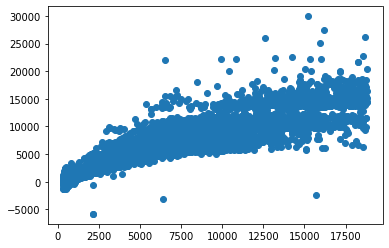

In [ ]:
plt.scatter(y_test,y_pred)